# ¿Cuál es el mejor videojuego?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Este proyecto se enfoca en realizar un análisis preliminar con datos de juegos desde el año 1980 a 2016, basado en las ventas de los juegos, el score, género de cada juego, así como también la plataforma y año de lanzamiento de cada uno, entre otros features del dataset. El dataset está conformado en su totalidad por 16715 registros juegos. El objetivo principal es analizar el comportamiento de las ventas de los juegos, determinar patrones, identificar tendencias que resulten en definitiva en la identificación de aquel o aquellos juegos o género o plataformas de juegos que generen más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from importlib import reload
plt=reload(plt)

## Paso-1 Cargar datos

In [3]:
# Carga el archivo de datos

df_games = pd.read_csv('games.csv')

## Paso-2 Preparación de los datos

[Los datos para este proyecto se concentran en una sólo dataset. Se procede a realizar una exploración para tener una comprensión inicial de los datos.]

## Exploración inicial del dataset

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df_games.shape

(16715, 11)

In [7]:
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Corregir datos

In [9]:
# Se reemplazan por minúsculas TODOS los nombres de las columnas.

df_games.columns = map(str.lower, df_games.columns)
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
100*df_games.isna().sum()/df_games.shape[0] 

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [11]:
# Convirtiendo la feature 'Year_of_Release' a tipo integer

df_games['year_of_release'] = df_games['year_of_release'].replace('nan', np.nan)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
# Convirtiendo la feature 'User_Score' a tipo float
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype(float)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Se evaluó la presencia de datos faltantes por columna. Se encontró el siguiente resultado:

1- En la columna critic_score faltan 8578 celdas, para un 51.3 % de datos faltantes.

2- En la columna user_score faltan 6701 celdas, para un 40 % de datos faltantes.

3- En la columna rating faltan 6766 celdas, para un 40 % de datos faltantes.

Siendo la columna critic_score, aquella que tiene mayor afectación.  

Aquellas columnas con menor afectación son:

1- La columna name tiene una afectación de 0.01 % de datos faltantes.

2- La columna year_of_release tiene una afectación de 1.60 % de datos faltantes.

3- La columna genre tiene una afectación de 0.01 % de datos faltantes.

### Tratamiento de los datos faltantes. 

1. Para las columnas con datos faltantes por encima del 40 % se decide sustituir los valores faltantes NaN, ya que no afectan la generación de gráficos, y no se decide imputarlos, ya que sólo para el caso en el que los datos faltantes en esa columna exceden del 60 % entonces si se imputarían.   

2. Para aquellas columnas en las que, la totalidad de los datos faltantes es menor al 2%, se decide eliminar esos registros.

In [13]:
# Se rellena la columna critic_score con valor 'NaN'

df_games['critic_score'].fillna('NaN') 
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# Deleting the NaNs rows in column name
df_games = df_games.dropna(subset=['name'])

In [15]:
# Deleting the NaNs rows in column year_of_release
df_games = df_games.dropna(subset=['year_of_release'])

In [16]:
# Deleting the NaNs rows in column name
df_games = df_games.dropna(subset=['genre'])

In [17]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [18]:
100*df_games.isna().sum()/df_games.shape[0] 

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

In [19]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64') 
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
# Cálculo de ventas totales 

df_games['ventas_totales'] = df_games['na_sales'] + df_games['eu_sales']+ df_games['jp_sales'] +df_games['other_sales']

In [21]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Comprobación de datos duplicados:

1- Se revisó la presencia de datos duplicados.

In [22]:
# Verification of the rows with duplicated values 

df_games.duplicated().sum()

0

## Conclusión de la parte de limpieza de los datos acometida

[En esta sección final, se enumeran las conclusiones importantes.]

1- Se revisaron los nombres de las 11 features encontrándose que están escritas en mayúsculas, las cuales fueron reemplazados a minúsculas.

2- Se verificó el tipo de datos de las columnas, y se convirtió la columna 'Year_of_Release' al tipo datetime porque refleja el año de lanzamiento de cada videojuego.

3- Se convirtió la columna 'user_score' al tipo float porque la evaluación del usuario puede contener el valor 8.3 por ejemplo, lo cual es de tipo flotante.

4- Se verificó la existencia de filas con datos faltantes, detectándose valores NaN en 3 de las 11 columnas, encontrándose valores faltantes en 8837 filas, siendo las columnas Critic_Score, User_Score y Rating. El manejo adoptado para afrontar el problema de la presencia de los datos ausentes fue: - Sustituir por NaN los valores ausentes en la columna critic_score. -En la columna 'user_score' se sustituyó 'tbd' por NaN. La presencia de los valores ausentes en los datos puede deberse a que al momento de la captura manual de los datos se omiten ciertos campos originado por errores humanos.  

5- Se verificó la existencia de filas duplicadas, sin encontrarse registro alguno. 

## Paso-3 Análisis de los datos

### 1- Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

<AxesSubplot:title={'center':'Distribución de video juegos por año'}, xlabel='Years', ylabel='Number of video games'>

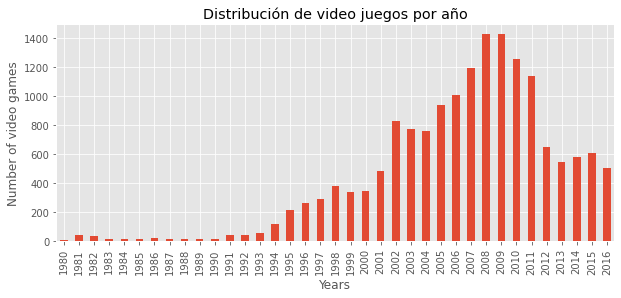

In [25]:
plt.style.use('ggplot')
df_games.groupby(['year_of_release'])['name'].count().plot( x='year_of_release',
        y='name',
        kind='bar',
        title='Distribución de video juegos por año',
        xlabel='Years',
        ylabel='Number of video games',  legend=False,         
        figsize=[10, 4])

<AxesSubplot:title={'center':'Distribución de ventas totales por año'}, xlabel='Years', ylabel='Number of video games'>

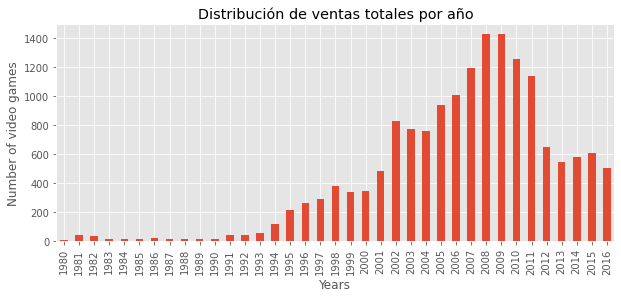

In [26]:
plt.style.use('ggplot')
df_games.groupby(['year_of_release'])['ventas_totales'].count().plot( x='year_of_release',
        y='ventas_totales',
        kind='bar',
        title='Distribución de ventas totales por año',
        xlabel='Years',
        ylabel='Number of video games',  legend=False,         
        figsize=[10, 4])

### 2- Obtener las ventas de una plataforma a la otra. Elegir las plataformas con mayores ventas totales.

<AxesSubplot:title={'center':'Distribución de video juegos por plataforma'}, xlabel='Platform', ylabel='Number of video games'>

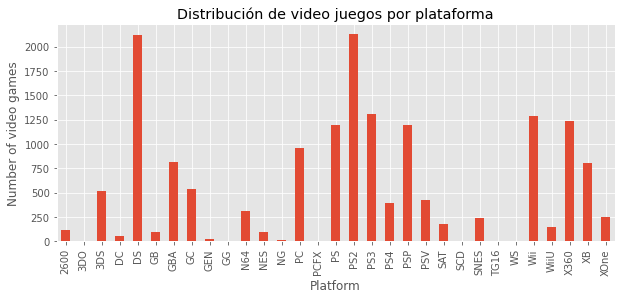

In [28]:
plt.style.use('ggplot')

df_games.groupby(['platform'])['name'].count().plot( x='platform',
        y='name',
        kind='bar',
        title='Distribución de video juegos por plataforma',
        xlabel='Platform',
        ylabel='Number of video games',  legend=False,         
        figsize=[10, 4])

In [29]:
s = df_games.groupby(['platform'])['ventas_totales'].sum()
s.sort_values(ascending=False).head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: ventas_totales, dtype: float64

#### De gráfico y tabla anterior, se puede observar que de manera general las plataformas de video juegos con mayores ventas son:

1. PS2

2. X360

3. PS3

4. Wii

5. DS

<AxesSubplot:title={'center':'Distribution by platform in 2008'}, xlabel='Platform', ylabel='Amount of revenues'>

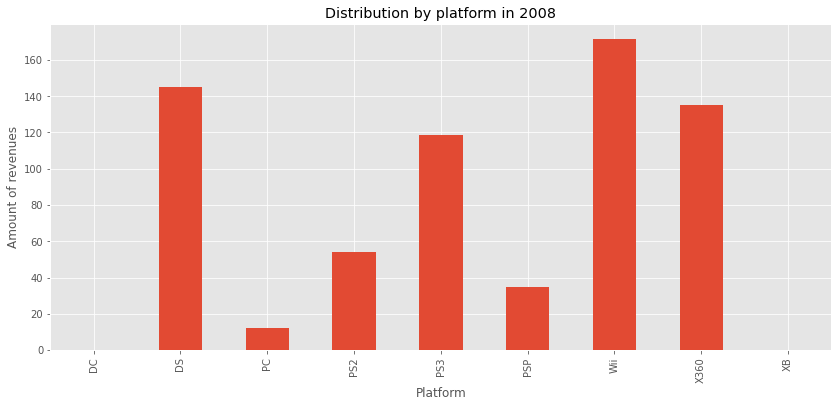

In [30]:
mis_booleans = (df_games['year_of_release']==2008 )
dfulti = df_games[mis_booleans].groupby('platform')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución por plataforma en 2008', ylabel='Ventas totales', xlabel='Platform', figsize=(14, 6))

<AxesSubplot:title={'center':'Distribución por plataforma en 2009'}, xlabel='Platform', ylabel='Ventas totales'>

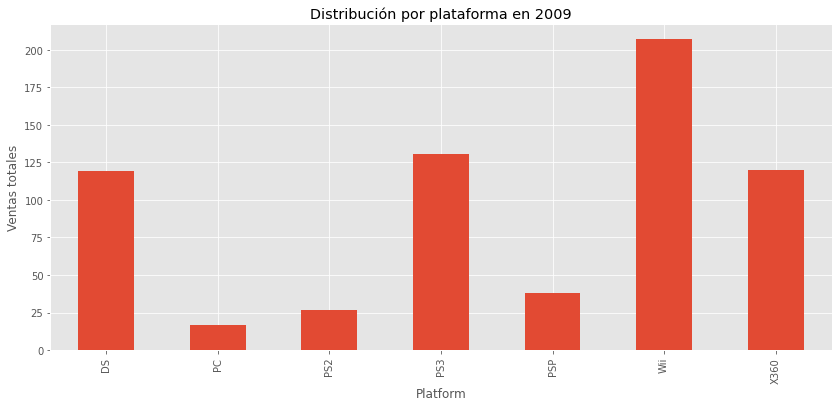

In [31]:
mis_booleans = (df_games['year_of_release']==2009 )
dfulti = df_games[mis_booleans].groupby('platform')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución por plataforma en 2009', ylabel='Ventas totales', xlabel='Platform', figsize=(14, 6))

### Se grafican las 5 plataformas de mayores ventas:

<AxesSubplot:title={'center':'Distribución para la plataforma PS2'}, xlabel='Platform PS2', ylabel='Ventas totales'>

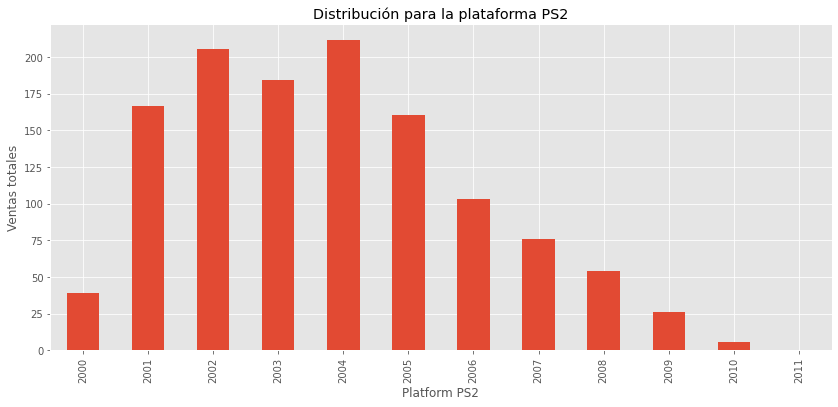

In [33]:
# PS2:

mis_booleans = (df_games['platform']=='PS2' )
dfulti = df_games[mis_booleans].groupby('year_of_release')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución para la plataforma PS2', ylabel='Ventas totales', xlabel='Platform PS2', figsize=(14, 6))

<AxesSubplot:title={'center':'Distribución para la plataforma X360'}, xlabel='Platform X360', ylabel='Ventas totales'>

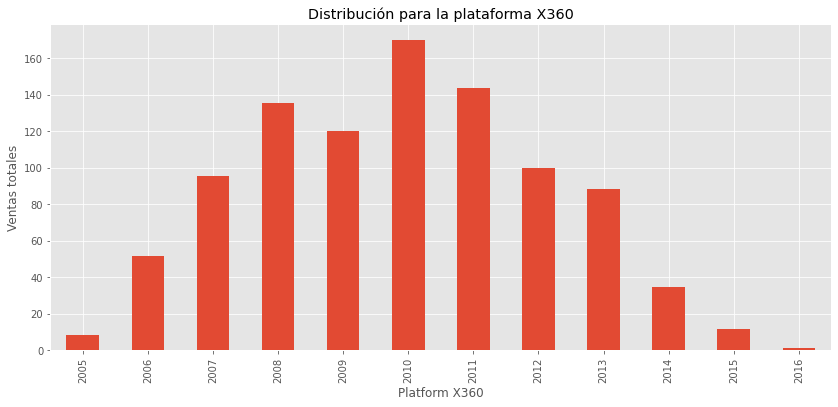

In [35]:
mis_booleans = (df_games['platform']=='X360' )
dfulti = df_games[mis_booleans].groupby('year_of_release')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución para la plataforma X360', ylabel='Ventas totales', xlabel='Platform X360', figsize=(14, 6))

<AxesSubplot:title={'center':'Distribución para la plataforma PS3'}, xlabel='Platform PS3', ylabel='Ventas totales'>

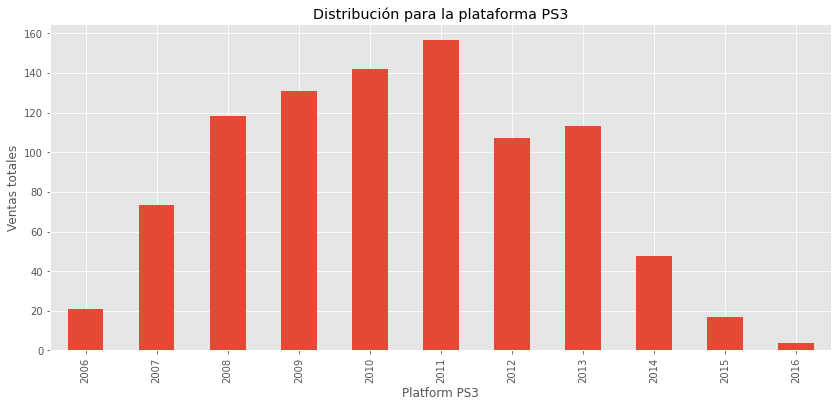

In [36]:
mis_booleans = (df_games['platform']=='PS3' )
dfulti = df_games[mis_booleans].groupby('year_of_release')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución para la plataforma PS3', ylabel='Ventas totales', xlabel='Platform PS3', figsize=(14, 6))

<AxesSubplot:title={'center':'Distribución para la plataforma Wii'}, xlabel='Platform Wii', ylabel='Ventas totales'>

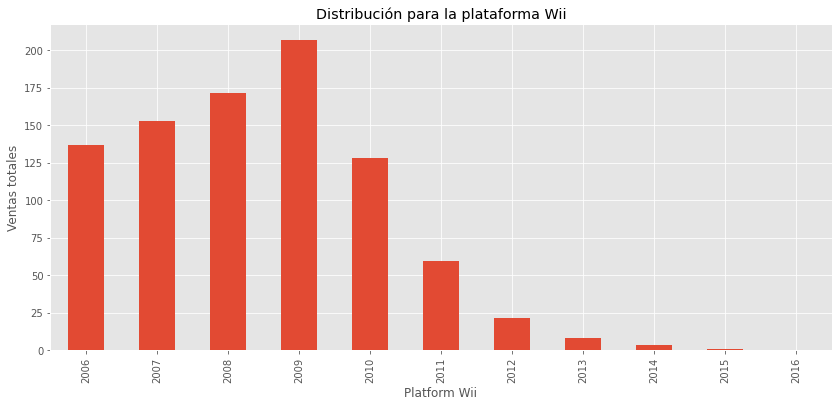

In [38]:
mis_booleans = (df_games['platform']=='Wii' )
dfulti = df_games[mis_booleans].groupby('year_of_release')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución para la plataforma Wii', ylabel='Ventas totales', xlabel='Platform Wii', figsize=(14, 6))

<AxesSubplot:title={'center':'Distribución para la plataforma DS'}, xlabel='Platform DS', ylabel='Ventas totales'>

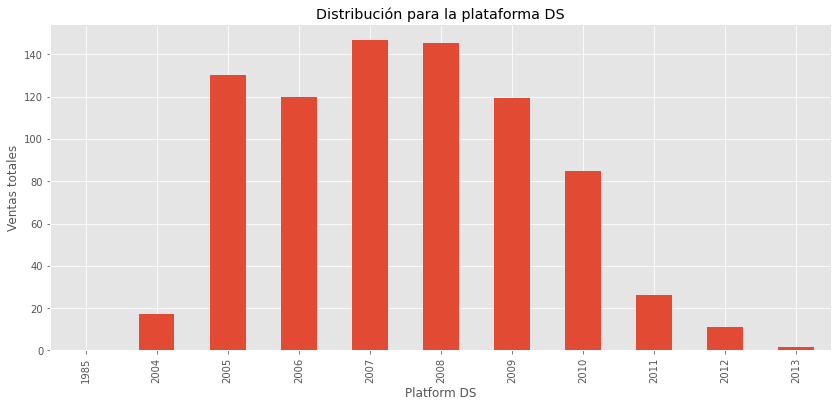

In [39]:
mis_booleans = (df_games['platform']=='DS')
dfulti = df_games[mis_booleans].groupby('year_of_release')['ventas_totales'].sum()
dfulti.plot(kind='bar', title='Distribución para la plataforma DS', ylabel='Ventas totales', xlabel='Platform DS', figsize=(14, 6))

### Las plataformas que solían ser populares pero que en años recientes (2016) no tienen ventas son:

1. Wii 

2. PS2

### El tiempo que tardan las plataformas en aparecer y luego desaparecer, es decir el ciclo de vida de una plataforma, oscila entre 8 a 10 años en promedio, aunque existen casos de tiempo superior como es el caso de la plataforma PS2, con 11 años, como se puede apreciar en uno de los gráficos anteriores.

### De los 5 gráficos anteriores se puede observar además, que en cada ciclo de vida de las plataformas existe una fase inicial que corresponde a un incremento de las ventas y posteriormente existe una fase de descenso en las ventas de videojuegos.

### 3-Determina para qué período se debe tomar datos. 

In [40]:
platfo_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_games_selected = df_games[df_games["platform"].isin(platfo_list)]
df_games_selected

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [41]:
platfo = df_games_selected.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()
platfo.head(5)

,year_of_release,platform,ventas_totales
0,1985,DS,0.02
1,2000,PS2,39.17
2,2001,PS2,166.43
3,2002,PS2,205.38
4,2003,PS2,184.31


<AxesSubplot:xlabel='year_of_release', ylabel='ventas_totales'>

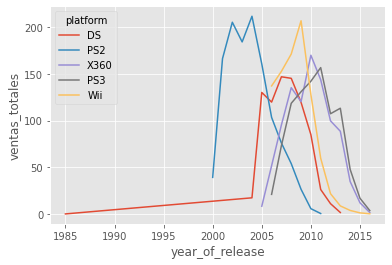

In [42]:
sns.lineplot(data = platfo , hue= 'platform', x = 'year_of_release', y ='ventas_totales') 

### Como se puede apreciar en el gráfico anterior existen valore atípicos en la plataforma DS. 

### Tomando en cuenta el gráfico anterior, en el que se aprecia el ciclo de vida de las consolas se considera un horizonte de tiempo de 5 años como máximo para la adquisición de datos, que corresponde al período de la fase inicial en el que las ventas se incrementan y llegan a su máximo valor.

### 5-Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

<AxesSubplot:title={'center':'Distribución total de las ventas por platforma'}, xlabel='Platform', ylabel='Total ventas'>

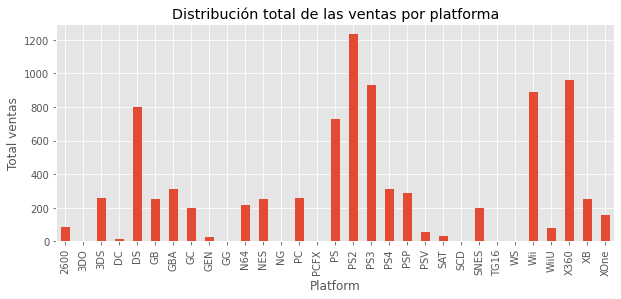

In [44]:
plt.style.use('ggplot')

df_games.groupby(['platform'])['ventas_totales'].sum().plot( x='platform',
        y='ventas_totales',
        kind='bar',
        title='Distribución total de las ventas por platforma',
        xlabel='Platform',
        ylabel='Total ventas',  legend=False,         
        figsize=[10, 4])

In [45]:
s = df_games.groupby(['platform'])['ventas_totales'].sum()
s.sort_values(ascending=False).head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: ventas_totales, dtype: float64

### Se observa que en los datos históricos las plataformas líderes en ventas son 'PS2', 'X360', 'PS3', 'Wii', 'DS', aunque han ido decayendo sus ventas.

In [46]:
platfo_list = ['NES', 'GB', 'SNES', 'GBA', 'PS4', '3DS', 'N64',  'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN',
               'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
df_games_selectedd = df_games[df_games["platform"].isin(platfo_list)]

mis_booleans = (df_games['year_of_release']>=2005 )
platfo = df_games_selectedd.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()
platfo.sort_values( by= 'ventas_totales', ascending=False).head(5)

,year_of_release,platform,ventas_totales
76,1998,PS,169.49
83,1999,PS,144.53
69,1997,PS,136.17
170,2015,PS4,118.90
163,2014,PS4,100.00


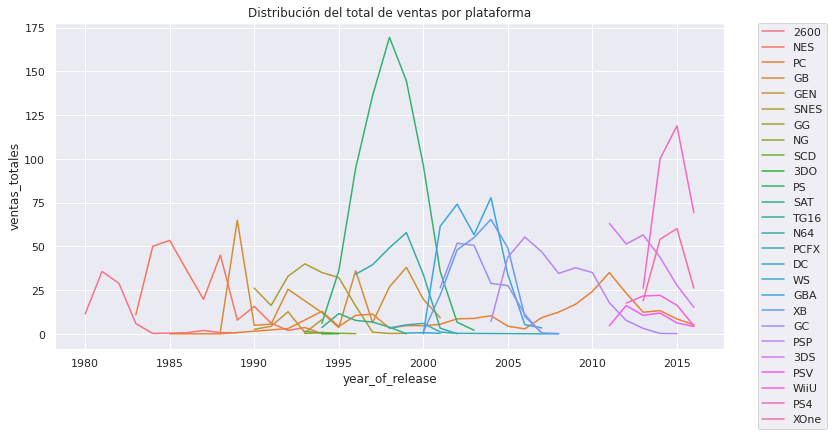

In [77]:
platfo = df_games_selectedd.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()

sns.lineplot(data = platfo , hue= 'platform', x = 'year_of_release', y ='ventas_totales') 
plt.title("Distribución del total de ventas por plataforma") 
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Plataformas en las cuales sus ventas se reducen:

1. PS2, X360, PS3, Wii, DS

### Plataformas en las que crecen sus ventas:

1. La plataforma PS4 tuvo crecimiento positivo en sus ventas de 2014 a 2015, aunque éstas descendieron en 2016, siendo la plataforma que potencialmente presente las mayores ventas de video juegos en el futuro.

2. XOne

3. 3DS

En general, se observa una tendencia orientada hacia una disminución de las ventas de video juegos.

In [57]:
# Analizando del periodo desde 2005 hasta el final de los datos que se tienen 

mis_booleans = (df_games['year_of_release']>=2005 )
platfo = df_games_selectedd[mis_booleans].groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()
platfo.sort_values( by= 'ventas_totales', ascending=False).head(5)

/tmp/ipykernel_27/64806421.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  platfo = df_games_selectedd[mis_booleans].groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()


,year_of_release,platform,ventas_totales
49,2015,PS4,118.90
42,2014,PS4,100.00
56,2016,PS4,69.25
24,2011,3DS,63.20
53,2015,XOne,60.14


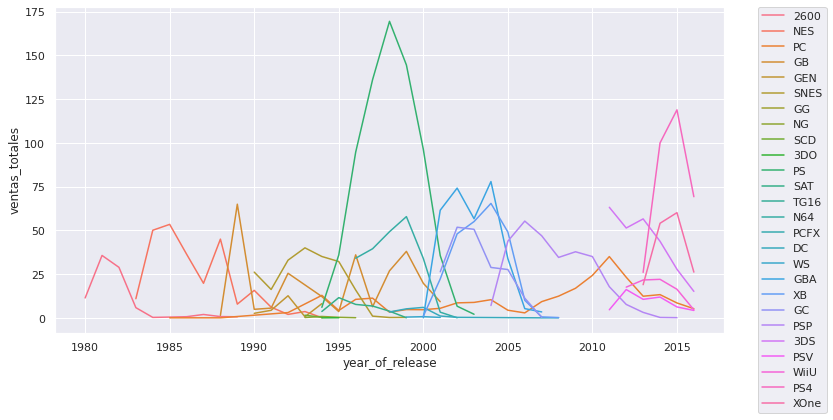

In [78]:
sns.lineplot(data = platfo , hue= 'platform', x = 'year_of_release', y ='ventas_totales') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(12,6)})

### 6- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

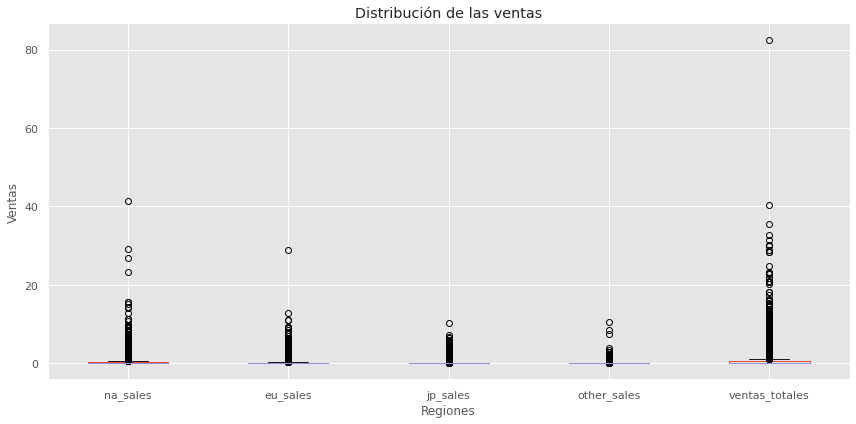

In [74]:
#Exploring the data for check the presence of outliers values

plt.style.use('ggplot')

ax = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'ventas_totales']].plot(kind='box', title='boxplot', figsize = (12, 6))
plt.title('Distribución de las ventas')
plt.xlabel('Regiones')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

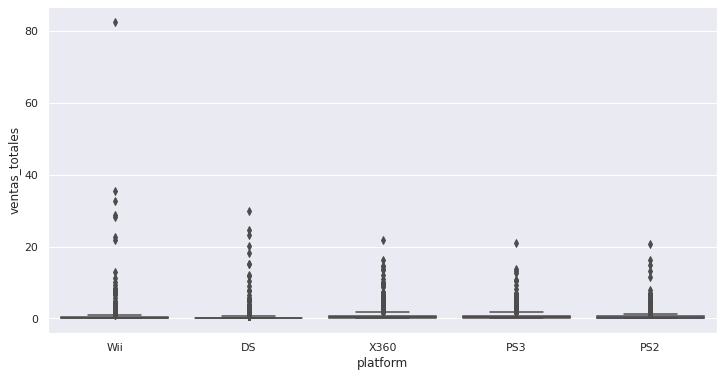

In [73]:
# Aquí se seleccionaron las top 5 plataformas 

sns.boxplot(data= df_games_selected, x = 'platform' , y = 'ventas_totales')
sns.set(rc={'figure.figsize':(12,6)})

No handles with labels found to put in legend.


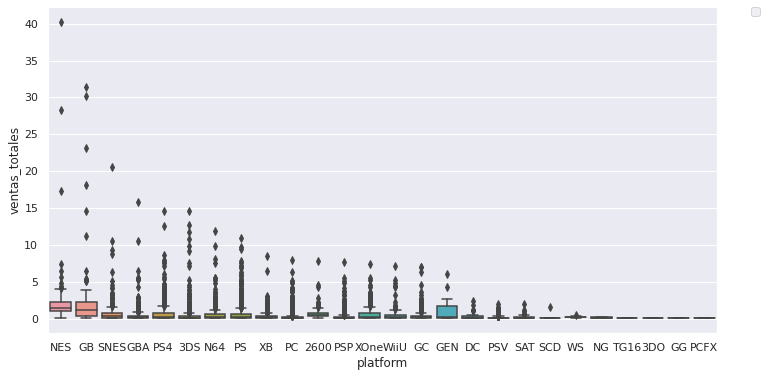

In [79]:
#sns.boxplot(data= df_games_selectedd, x = 'ventas_totales' , y = 'platform' , showfliers= False)
sns.boxplot(data= df_games_selectedd, x = 'platform' , y = 'ventas_totales')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(12,6)})

### Tratamiento de los valores atípicos

In [62]:
def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR 
    mean = X[feature].mean()    
    X.loc[X[feature] < minimum, feature] = mean
    X.loc[X[feature] > maximum, feature] = mean

In [63]:
X = df_games.drop(columns =['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'])

In [64]:
for i in range(len(X.columns)):    
    remove_outlier(X.columns[i])    

In [65]:
df_gamest = X

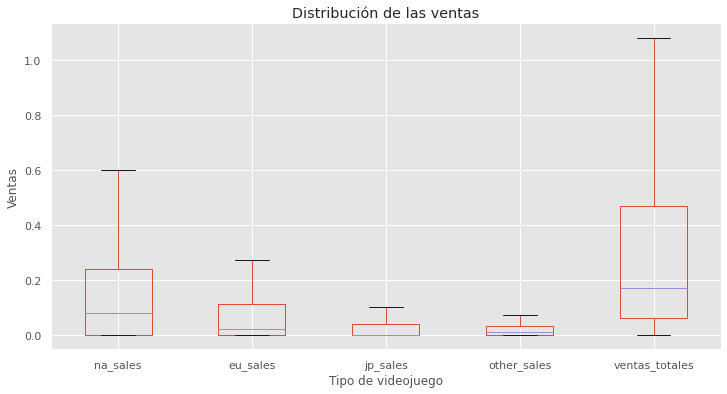

In [71]:
#After treatment of the outliers, verification of the remaining values.

plt.style.use('ggplot')

# Plot the dataframe
ax = df_gamest[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'ventas_totales']].plot(kind='box', title='boxplot', figsize = (12, 6))
ax.set_title('Distribución de las ventas')
ax.set_xlabel('Tipo de videojuego')
ax.set_ylabel('Ventas')
plt.show()

In [67]:
df_gamest

,na_sales,eu_sales,jp_sales,other_sales,ventas_totales
0,0.264012,0.14593,0.078487,0.047594,0.536023
1,0.264012,0.14593,0.078487,0.047594,0.536023
2,0.264012,0.14593,0.078487,0.047594,0.536023
3,0.264012,0.14593,0.078487,0.047594,0.536023
4,0.264012,0.14593,0.078487,0.047594,0.536023
...,...,...,...,...,...
16710,0.000000,0.00000,0.010000,0.000000,0.010000
16711,0.000000,0.01000,0.000000,0.000000,0.010000
16712,0.000000,0.00000,0.010000,0.000000,0.010000
16713,0.010000,0.00000,0.000000,0.000000,0.010000


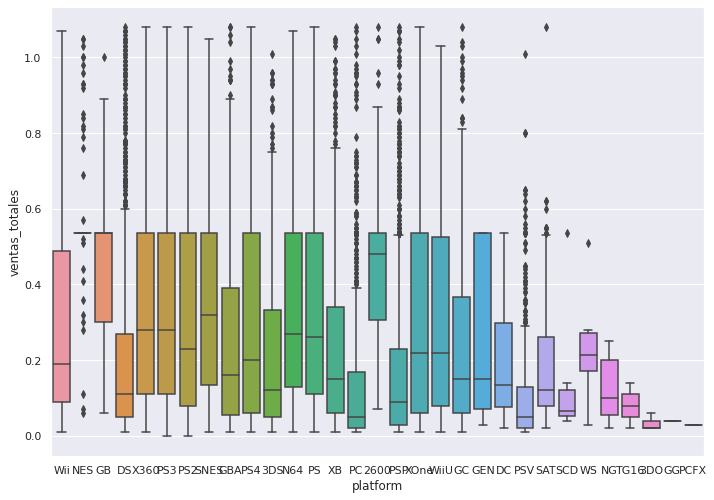

In [70]:
df_gamesttt = df_games.loc[:, ['platform']]
df_gamestneww = pd.merge(df_gamesttt,df_gamest, left_index=True, right_index=True)
sns.boxplot(data= df_gamestneww, x = 'platform' , y = 'ventas_totales')
sns.set(rc={'figure.figsize':(12,6)})

In [80]:
df_gamestt = df_games.loc[:, ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']]
df_gamestt 

,name,platform,year_of_release,genre,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,NaN,NaN,NaN


In [81]:
df_gamestnew = pd.merge(df_gamestt,df_gamest, left_index=True, right_index=True)
df_gamestnew

,name,platform,year_of_release,genre,critic_score,user_score,rating,na_sales,eu_sales,jp_sales,other_sales,ventas_totales
0,Wii Sports,Wii,2006,Sports,76.0,8.0,E,0.264012,0.14593,0.078487,0.047594,0.536023
1,Super Mario Bros.,NES,1985,Platform,NaN,NaN,NaN,0.264012,0.14593,0.078487,0.047594,0.536023
2,Mario Kart Wii,Wii,2008,Racing,82.0,8.3,E,0.264012,0.14593,0.078487,0.047594,0.536023
3,Wii Sports Resort,Wii,2009,Sports,80.0,8.0,E,0.264012,0.14593,0.078487,0.047594,0.536023
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,NaN,NaN,NaN,0.264012,0.14593,0.078487,0.047594,0.536023
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,NaN,NaN,NaN,0.000000,0.00000,0.010000,0.000000,0.010000
16711,LMA Manager 2007,X360,2006,Sports,NaN,NaN,NaN,0.000000,0.01000,0.000000,0.000000,0.010000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,NaN,NaN,NaN,0.000000,0.00000,0.010000,0.000000,0.010000
16713,Spirits & Spells,GBA,2003,Platform,NaN,NaN,NaN,0.010000,0.00000,0.000000,0.000000,0.010000


In [82]:
# Quitando puntos extremos en platform DS
mis_booleans = (df_gamestnew['year_of_release'] <= 2000 ) & (df_gamestnew['platform'] == 'DS')  
df1= df_gamestnew.drop( df_gamestnew.index[ (df_gamestnew['year_of_release'] <= 2000 ) & (df_gamestnew['platform'] == 'DS') ] ) #].groupby(['Embarked', 'Sex'])['Sex'].count() 
df1

,name,platform,year_of_release,genre,critic_score,user_score,rating,na_sales,eu_sales,jp_sales,other_sales,ventas_totales
0,Wii Sports,Wii,2006,Sports,76.0,8.0,E,0.264012,0.14593,0.078487,0.047594,0.536023
1,Super Mario Bros.,NES,1985,Platform,NaN,NaN,NaN,0.264012,0.14593,0.078487,0.047594,0.536023
2,Mario Kart Wii,Wii,2008,Racing,82.0,8.3,E,0.264012,0.14593,0.078487,0.047594,0.536023
3,Wii Sports Resort,Wii,2009,Sports,80.0,8.0,E,0.264012,0.14593,0.078487,0.047594,0.536023
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,NaN,NaN,NaN,0.264012,0.14593,0.078487,0.047594,0.536023
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,NaN,NaN,NaN,0.000000,0.00000,0.010000,0.000000,0.010000
16711,LMA Manager 2007,X360,2006,Sports,NaN,NaN,NaN,0.000000,0.01000,0.000000,0.000000,0.010000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,NaN,NaN,NaN,0.000000,0.00000,0.010000,0.000000,0.010000
16713,Spirits & Spells,GBA,2003,Platform,NaN,NaN,NaN,0.010000,0.00000,0.000000,0.000000,0.010000


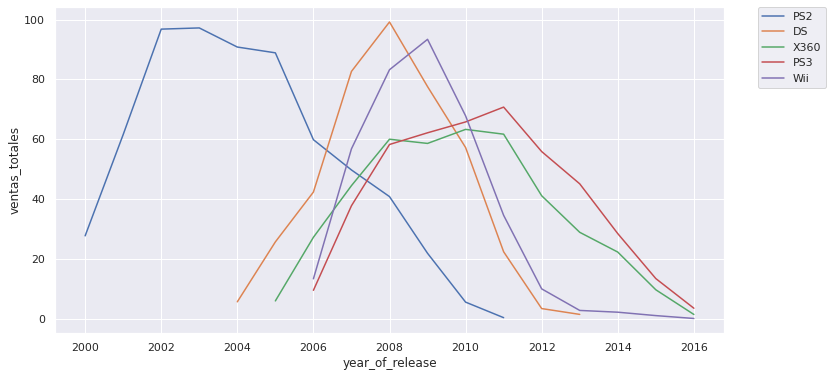

In [85]:
platfo_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_games_select = df1[df1["platform"].isin(platfo_list)]
platf = df_games_select.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()

sns.lineplot(data = platf, hue= 'platform', x = 'year_of_release', y ='ventas_totales') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(12,6)})

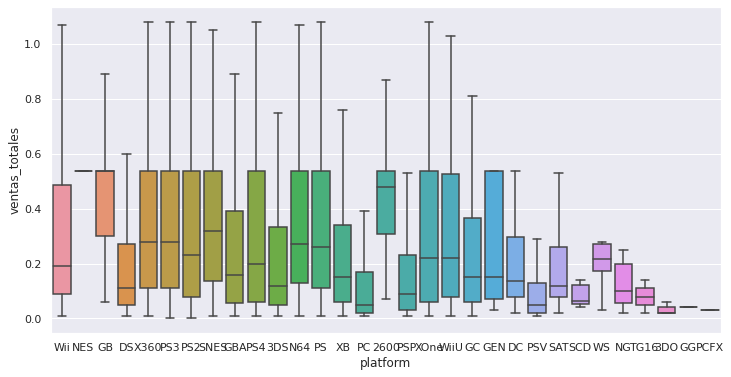

In [87]:
sns.boxplot(data= df_gamestnew, x = 'platform' , y = 'ventas_totales', showfliers = False)
sns.set(rc={'figure.figsize':(12,6)})

### Sobre las ventas entre plataformas, se observa que:

Para una mejor organización se dividen las plataformas en 3 grupos, a saber:

grupo-1: NES, GG y PCFX

grupo-2: DS, PC, PSP, PSV, SCD, NG, TG16 y 3DO 

grupo-3: Wii, X360, PS3, PS2, SNES, PS4, N64, PS5, XOne y WiiU

1. Las plataformas en el grupo 1 prácticamente no han tenido ventas.  

2. Por otro lado, las plataformas pertenecientes al grupo 2, poseen muy pocas ventas y tienen su media considerablemente menor con respecto a aquellas del grupo 3.  

3. Finalmente, en el grupo 3, se observan las plataformas que las ventas más altas, y tienen entre ellas sus ventas son similares en este período de tiempo.

En general, se aprecia que existen diferencias en la mediana de las ventas por plataforma. 

### 7- Explorando si las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crear un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

In [88]:
# Se ha escogido a la plataforma Wii.
platfo_list = ['Wii']
df_games_select_Wii = df1[df1["platform"].isin(platfo_list)]
platf_Wii = df_games_select_Wii.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()

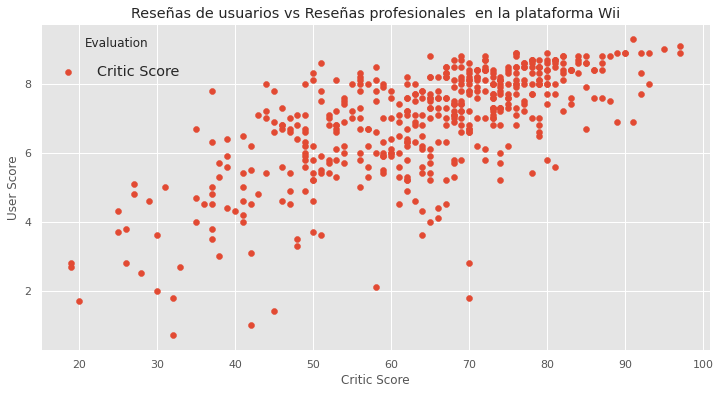

In [90]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
plt.title('Reseñas de usuarios vs Reseñas profesionales  en la plataforma Wii')
ax.set_xlabel("Critic Score")
ax.set_ylabel("User Score")
plt.scatter(df_games_select_Wii['critic_score'], df_games_select_Wii['user_score'])
plt.legend(['Critic Score', 'User Score'], frameon=False, labelspacing=1, title='Evaluation', handletextpad=1,fontsize="x-large", loc='upper left')
plt.show()

In [91]:
df_games_select_Wiii = df_games_select_Wii.loc[:, ['critic_score', 'user_score', 'ventas_totales']]

In [92]:
matrix = df_games_select_Wiii.corr(method='pearson')
matrix

,critic_score,user_score,ventas_totales
critic_score,1.000000,0.688285,0.381402
user_score,0.688285,1.000000,0.218921
ventas_totales,0.381402,0.218921,1.000000


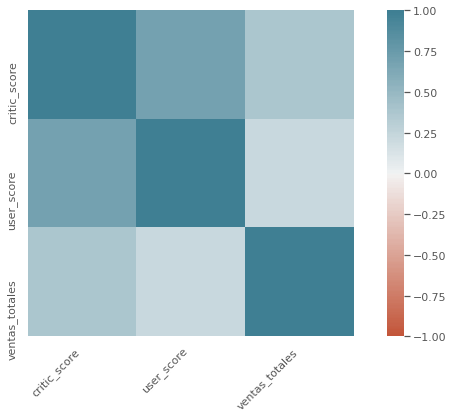

In [93]:
# Correlación entre las reseñas y las ventas totales en la plataforma Wii

corr = df_games_select_Wiii.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right');

### Conclusiones:

1. Luego de observar la imagen y tabla anterior, se aprecia existe una débil correlación positiva tanto de reseñas de los usuarios y como de las reseñas profesionales de la crítica con relación a las ventas totales en la plataforma Wii, ilustrado por el coeficiente de 0.21 y 0.38 respectivamente, lo cual se indica que para un aumento en las ventas en esta plataforma existe un tenue incremento en las reseñas de los usuarios.  

2. Se utilizó el coeficiente de correlación de Pearson.

### 8-Comparar las ventas de los mismos juegos en otras plataformas

In [94]:
df_games_all = df_games.groupby(['platform'])['ventas_totales'].sum() 

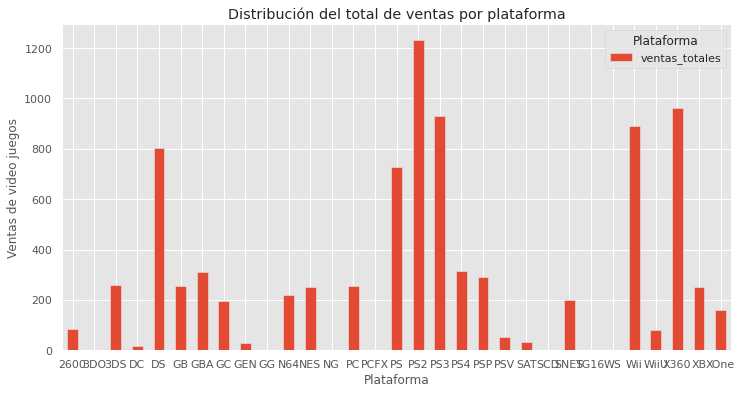

In [95]:
plt.style.use('ggplot')
df_games_all.plot(kind='bar', figsize = (12, 6), rot= 0)
plt.xlabel("Plataforma")
plt.ylabel("Ventas de video juegos")
plt.title("Distribución del total de ventas por plataforma") 
plt.legend(title='Plataforma')
plt.show()

### Conclusión:

1. Tomando en cuenta todas las plataformas los años de máximo número de ventas corresponde al 2008, en el que la plataforma Wii engloba 171.32 del total global de las ventas en ese año.

### Paso 4. Crea un perfil de usuario para cada región para evaluar: 

1. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra

2. Los cinco géneros principales

3. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

## Sobre las Plataformas

In [170]:
market_sales = df_games.groupby('platform').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()

In [171]:
market_sales = pd.melt(market_sales, id_vars = ['platform'], value_vars = ['na_sales', 'jp_sales', 'eu_sales'],  var_name = 'market') 

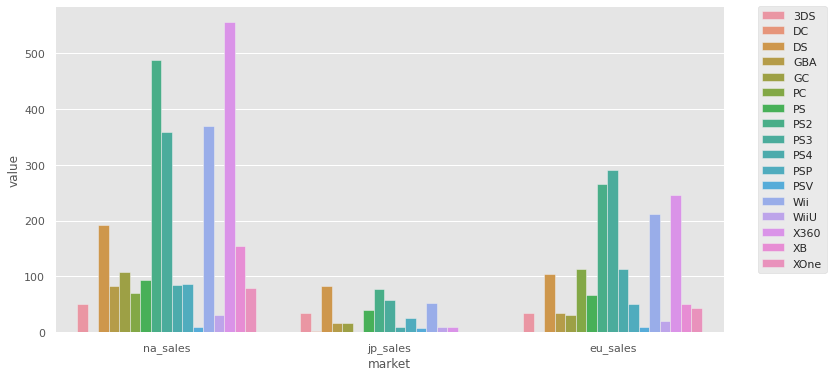

In [172]:
valor_plot = sns.barplot(data = market_sales,x='market', y= 'value', hue = 'platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [137]:
# Se deben normalizar los valores para facilitar su comparación.

from sklearn import preprocessing

specific_columns = ['na_sales', 'jp_sales', 'eu_sales']
df_games_condensed = df_games.loc[:, ['na_sales', 'jp_sales', 'eu_sales']]

d = preprocessing.normalize(df_games_condensed, axis=0)
scaled_df = pd.DataFrame(d, columns=specific_columns)
scaled_df

,na_sales,jp_sales,eu_sales
0,0.375090,0.091633,0.428292
1,0.263724,0.165522,0.052945
2,0.142201,0.092119,0.188709
3,0.141566,0.079723,0.161645
4,0.102207,0.248405,0.131475
...,...,...,...
16439,0.000000,0.000243,0.000000
16440,0.000000,0.000000,0.000148
16441,0.000000,0.000243,0.000000
16442,0.000091,0.000000,0.000000


In [138]:
df_gamest_simple = df_games.loc[:, ['platform']]
df_gamestnewscaled = pd.merge(df_gamest_simple, scaled_df, left_index=True, right_index=True)
df_gamestnewscaled

,platform,na_sales,jp_sales,eu_sales
0,Wii,0.375090,0.091633,0.428292
1,NES,0.263724,0.165522,0.052945
2,Wii,0.142201,0.092119,0.188709
3,Wii,0.141566,0.079723,0.161645
4,GB,0.102207,0.248405,0.131475
...,...,...,...,...
16439,PS2,0.000000,0.000243,0.000000
16440,DS,0.000000,0.000000,0.000148
16441,DS,0.000000,0.000243,0.000000
16442,XB,0.000091,0.000000,0.000000


In [144]:
df_new = df_gamestnewscaled.groupby(['platform']).sum()
df_new.sort_values(by='na_sales', ascending=False).head(20)

,na_sales,jp_sales,eu_sales
platform,,,
PS2,5.319372,4.450383,4.775692
X360,4.537904,2.627452,3.822388
PS3,4.083551,2.614083,3.907129
Wii,4.022971,2.694779,3.733358
DS,3.379622,3.556174,3.114582
PS,3.168860,2.540923,3.017566
GBA,1.379201,1.341191,1.159908
NES,1.337212,0.751291,0.817837
PS4,1.294316,0.601567,1.607722


In [146]:
market_sales.columns

Index(['platform', 'market', 'value'], dtype='object')

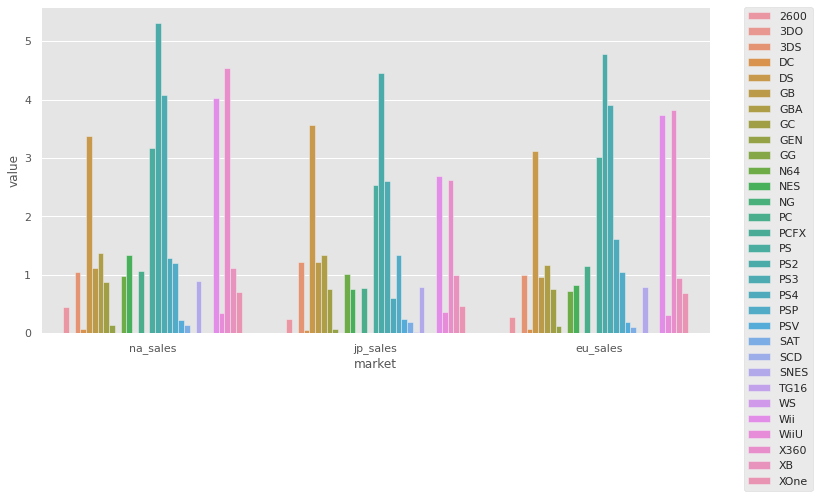

In [149]:
market_sales = df_gamestnewscaled.groupby('platform').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()

market_sales = pd.melt(market_sales, id_vars = ['platform'], value_vars = ['na_sales', 'jp_sales', 'eu_sales'],  var_name = 'market') 

plt.style.use('ggplot')
valor_plot = sns.barplot(data = market_sales, x='market', y= 'value', hue = 'platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [150]:
# Se deben normalizar para facilitar su comparación, ya que estarían en la misma escala incluyendo todas las plataformas.

from sklearn import preprocessing

specific_columns = ['na_sales', 'jp_sales', 'eu_sales']
df_games_condensed = df_games.loc[:, ['na_sales', 'jp_sales', 'eu_sales']]

d = preprocessing.normalize(df_games_condensed, axis=0)
scaled_df = pd.DataFrame(d, columns=specific_columns)
scaled_df

,na_sales,jp_sales,eu_sales
0,0.375090,0.091633,0.428292
1,0.263724,0.165522,0.052945
2,0.142201,0.092119,0.188709
3,0.141566,0.079723,0.161645
4,0.102207,0.248405,0.131475
...,...,...,...
16439,0.000000,0.000243,0.000000
16440,0.000000,0.000000,0.000148
16441,0.000000,0.000243,0.000000
16442,0.000091,0.000000,0.000000


In [151]:
df_gamest_simple = df_games.loc[:, ['platform']]
df_gamestnewscaled = pd.merge(df_gamest_simple, scaled_df, left_index=True, right_index=True)
df_gamestnewscaled

,platform,na_sales,jp_sales,eu_sales
0,Wii,0.375090,0.091633,0.428292
1,NES,0.263724,0.165522,0.052945
2,Wii,0.142201,0.092119,0.188709
3,Wii,0.141566,0.079723,0.161645
4,GB,0.102207,0.248405,0.131475
...,...,...,...,...
16439,PS2,0.000000,0.000243,0.000000
16440,DS,0.000000,0.000000,0.000148
16441,DS,0.000000,0.000243,0.000000
16442,XB,0.000091,0.000000,0.000000


In [152]:
df_new = df_gamestnewscaled.groupby(['platform']).sum()
df_new.sort_values(by='na_sales', ascending=False).head(20)

,na_sales,jp_sales,eu_sales
platform,,,
2600,0.446372,0.245002,0.270049
3DO,0.000453,0.000486,0.000296
3DS,1.051994,1.210912,1.000038
DC,0.065387,0.049098,0.073354
DS,3.379622,3.556174,3.114582
GB,1.123094,1.225253,0.953157
GBA,1.379201,1.341191,1.159908
GC,0.881771,0.753964,0.753800
GEN,0.141747,0.066355,0.115651


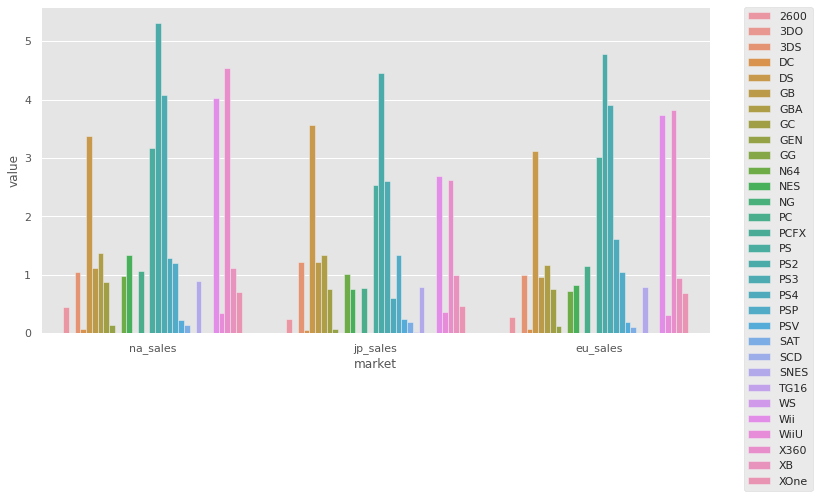

In [153]:
market_sales = df_gamestnewscaled.groupby('platform').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()

market_sales = pd.melt(market_sales, id_vars = ['platform'], value_vars = ['na_sales', 'jp_sales', 'eu_sales'],  var_name = 'market') 
plt.style.use('ggplot')
valor_plot =  sns.barplot(data = market_sales, x='market', y= 'value', hue = 'platform' )
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 1. Luego de analizar el gráfico anterior para las plataformas:  

En lo referente a las plataformas, de las 5 principales a saber; 'PS2', 'X360', 'PS3', 'Wii', 'DS', se obtuvo que PS2 es la plataforma de mayor presencia entre todas las regiones. A continuación, le sigue las plataformas X360, PS3 y Wii con una presencia importante y bastante similar entre ellas en las regiones de NA y EU, aunque ambas con menor presencia en la región de JP. Por última la plataforma DS, tiene una presencia muy similar en las 3 regiones, aunque en menor consideración que las 4 plataformas anteriores.

## Sobre los géneros

In [154]:
market_salesg = df_games.groupby('genre').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()
market_salesg

,genre,na_sales,eu_sales,jp_sales
0,Action,863.17,510.99,160.14
1,Adventure,101.52,63.20,52.24
2,Fighting,220.51,99.00,87.28
3,Misc,399.57,210.60,107.02
4,Platform,444.44,199.39,130.71
5,Puzzle,121.13,49.78,56.68
6,Racing,356.86,234.49,56.63
7,Role-Playing,330.04,188.24,353.39
8,Shooter,584.83,314.52,38.68
9,Simulation,180.40,113.35,63.64


In [155]:
# Uniendo los valores normalizados al género para obtener los 5 géneros principales en un gráfico
df_gamest_simple = df_games.loc[:, ['genre']]
df_gamestnewscaled = pd.merge(df_gamest_simple, scaled_df, left_index=True, right_index=True)
df_gamestnewscaled

,genre,na_sales,jp_sales,eu_sales
0,Sports,0.375090,0.091633,0.428292
1,Platform,0.263724,0.165522,0.052945
2,Racing,0.142201,0.092119,0.188709
3,Sports,0.141566,0.079723,0.161645
4,Role-Playing,0.102207,0.248405,0.131475
...,...,...,...,...
16439,Misc,0.000000,0.000243,0.000000
16440,Puzzle,0.000000,0.000000,0.000148
16441,Simulation,0.000000,0.000243,0.000000
16442,Action,0.000091,0.000000,0.000000


In [156]:
df_new =  df_gamestnewscaled.groupby(['genre']).sum()
df_new.sort_values(by='na_sales', ascending=False).head(20)

,na_sales,jp_sales,eu_sales
genre,,,
Action,7.527199,5.559940,6.951019
Sports,5.641500,4.268819,5.572085
Shooter,4.883611,2.679952,4.256004
Platform,3.814295,3.031170,3.117244
Role-Playing,3.768588,4.249131,3.765746
Misc,3.554289,2.810960,3.047883
Racing,3.233703,2.510784,2.835068
Fighting,1.891322,1.952481,1.682407
Simulation,1.614176,1.277510,1.671463


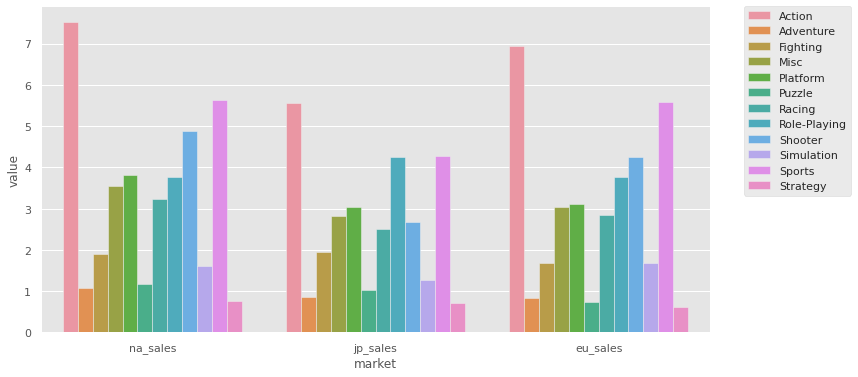

In [157]:
market_sales = df_gamestnewscaled.groupby('genre').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()

market_sales = pd.melt(market_sales, id_vars = ['genre'], value_vars = ['na_sales', 'jp_sales', 'eu_sales'],  var_name = 'market') 

valor_plot = sns.barplot(data = market_sales, x='market', y= 'value', hue = 'genre')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 2. Luego de analizar el gráfico anterior sobre los géneros:  

En lo referente a los géneros, los videojuegos del género Action son los más consumidos en las 3 regiones NA, EU y JP, y a continuación le siguen los videojuegos del género Sports y Shooter. En el cuarto puesto, los videojuegos de plataforma presentan un comportamiento muy similar en las 3 regiones, mientras que los del género 'Role-Playing' presentan un mayor consumo en Japón que los de plataforma.

## Sobre las clasificaciones ESRB

In [158]:
market_salesclas = df_games.groupby('rating').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()
market_salesclas.sort_values(by='na_sales', ascending=False)

,rating,na_sales,eu_sales,jp_sales
1,E,1274.24,703.87,197.96
7,T,747.60,421.79,150.70
5,M,742.89,480.00,63.58
2,E10+,345.50,183.35,40.20
4,K-A,2.56,0.27,1.46
3,EC,1.53,0.11,0.00
0,AO,1.26,0.61,0.00
6,RP,0.00,0.03,0.00


In [159]:
df_gamest_simple = df_games.loc[:, ['rating']]
df_gamestnewscaledr = pd.merge(df_gamest_simple, scaled_df, left_index=True, right_index=True)
df_gamestnewscaledr

,rating,na_sales,jp_sales,eu_sales
0,E,0.375090,0.091633,0.428292
1,NaN,0.263724,0.165522,0.052945
2,E,0.142201,0.092119,0.188709
3,E,0.141566,0.079723,0.161645
4,NaN,0.102207,0.248405,0.131475
...,...,...,...,...
16439,E,0.000000,0.000243,0.000000
16440,NaN,0.000000,0.000000,0.000148
16441,NaN,0.000000,0.000243,0.000000
16442,T,0.000091,0.000000,0.000000


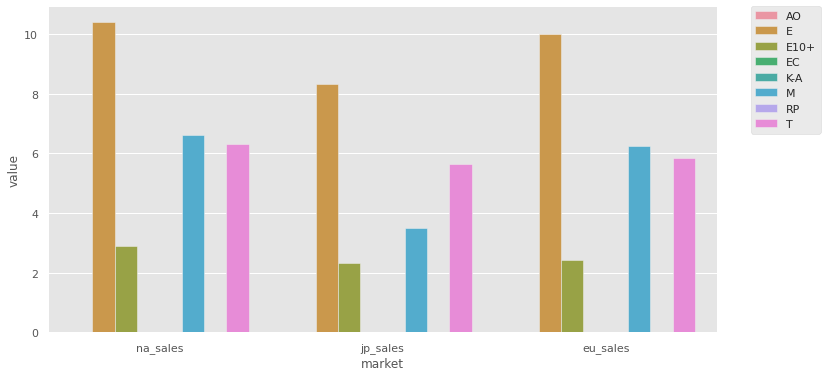

In [160]:
market_sales = df_gamestnewscaledr.groupby('rating').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).reset_index()

market_sales = pd.melt(market_sales, id_vars = ['rating'], value_vars = ['na_sales', 'jp_sales', 'eu_sales'],  var_name = 'market') 

valor_plot = sns.barplot(data = market_sales, x='market', y= 'value', hue = 'rating')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Conclusiones:


1. En lo referente a las plataformas, de las 5 principales a saber; 'PS2', 'X360', 'PS3', 'Wii', 'DS', se obtuvo que PS2 es la plataforma de mayor presencia entre todas las regiones. A continuación, le sigue las plataformas X360, PS3 y Wii con una presencia importante y bastante similar entre ellas en las regiones de NA y EU, aunque ambas con menor presencia en la región de JP. Por última la plataforma DS, tiene una presencia muy similar en las 3 regiones, aunque en menor consideración que las 4 plataformas anteriores. 

2. En la comparativa por géneros; los videojuegos del género Action son los más consumidos en las 3 regiones NA, UE y JP, y a continuación le siguen los videojuegos del género Sports y Shooter. En el cuarto puesto, los videojuegos de plataforma presentan un comportamiento muy similar en las 3 regiones, mientras que los del género 'Role-Playing' presentan un mayor consumo en Japón que los de plataforma.

3. En lo referente a la clasificación ESRB, se encontró que los juegos de la categoría E ('Everyone') son los mejor vendidos en todas las regiones, seguido de la categoría T y M, en segundo y tercer lugar respectivamente. Videojuegos de esta última categoría decaen en la región JP. Los videojuegos que pertenecen a la categoría Teen se suelen vender más en la región de Norteamérica que en Europa y Japón. 

Por otro lado, existe otra clasificación (PEGI system) utilizada en United Kingdom y la mayoría de países de Europa, lo cual implica, que un mismo juego pueda tener clasificaciones diferentes y esto puede afectar las ventas del mismo.

Se encontró además que:

1. En las plataformas Wii y X360 presentan comportamientos muy similares en las 3 regiones.  

2. En tanto en el apartado de Género, los videojuegos del género Misc y Platform presentan comportamientos muy similares en las 3 regiones, así como también Adventure y Fighting. 

3. En las categorías T (Teen) y M (Mature), ambas presentan comportamientos muy similares en las 3 regiones.

In [161]:
df_games = df_games.dropna(subset=['user_score'], how='all')
y = df_games[df_games['platform'] == 'PC'].groupby(['year_of_release'])['user_score'].mean()

In [162]:
x = df_games[df_games['platform'] == 'XOne'].groupby(['year_of_release'])['user_score'].mean()

### 5. Pruebas de hipótesis

### Caso-1— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

### Definiendo las hipótesis:
H_0: Las calificaciones promedio procedentes de los usuarios de las plataformas Xbox One y PC son iguales.

H_1: Las calificaciones promedio procedentes de los usuarios de las plataformas Xbox One y PC son diferentes.

### Estadístico de prueba:


### Región de rechazo:

Estadístico t-test utilizado

alpha = 0.05 

In [164]:
# Primero se aplica una prueba de Levene

x = df_games[df_games['platform'] == 'XOne'].groupby(['year_of_release'])['user_score'].mean()
y = df_games[df_games['platform'] == 'PC'].groupby(['year_of_release'])['user_score'].mean()

st.levene(x, y)

LeveneResult(statistic=2.1644347177904146, pvalue=0.1532372314191405)

El resultado del test de levene arroja 2.16 en el estadístico de prueba y 0.15 en el p-value, siendo éste último mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, por tanto las varianzas de las poblaciones son iguales.

In [165]:
st.ttest_ind(x, y, equal_var = True)

Ttest_indResult(statistic=-1.1785202115871063, pvalue=0.24926301236747442)

El parámetro equal_va se mantiene en True ya que la prueba de levene arrojó que las varianzas de las poblaciones son iguales.

Se aplicó la prueba T-test, obteniéndose un p-valor de 0.24 y -1.17 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, y se considera que las calificaciones promedio procedentes de los usuarios de las plataformas Xbox One y PC son iguales.

### Caso-2— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Definiendo las hipótesis:
H_0: Las calificaciones promedio procedentes de los usuarios para los géneros Action y Sports son iguales.

H_1: Las calificaciones promedio procedentes de los usuarios para los géneros Action y Sports son diferentes.

### Estadístico de prueba:


### Región de rechazo:

Estadístico t-test utilizado

alpha = 0.05 

In [166]:
# Primero se aplica una prueba de Levene

x = df_games[df_games['genre'] == 'Action'].groupby(['year_of_release'])['user_score'].mean()
y = df_games[df_games['genre'] == 'Sports'].groupby(['year_of_release'])['user_score'].mean()

st.levene(x, y)

LeveneResult(statistic=4.34105736669195, pvalue=0.04398172752566475)

El resultado del test de levene arroja 4.34 en el estadístico de prueba y 0.04 en el p-value, siendo éste último menor que el nivel de significancia, tras lo cual se rechaza Hipótesis nula y sese dice que las varianzas son estadísticamente diferentes.

In [167]:
st.ttest_ind(x, y, equal_var = False)

Ttest_indResult(statistic=1.185939881719417, pvalue=0.24551854019233893)

equal_var se establece en False pues la prueba de levene arrojó que las varianzas de las poblaciones son diferentes.

Se aplicó la prueba T-test, obteniéndose un p-valor de 0.24 y 1.18 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, y se considera que las calificaciones promedio procedentes de los usuarios para los géneros Action y Sports son iguales.

### Paso 6. Conclusiones generales:

1-  Luego del análisis se encontró que el tiempo que tardan las plataformas en aparecer y luego desaparecer, es decir el ciclo de vida de una plataforma, oscila entre 8 y 10 años en promedio, aunque existen casos de tiempo superior como es el caso de la plataforma PS2, con 11 años. En cada ciclo de vida de las plataformas existe una fase inicial que corresponde a un incremento de las ventas y posteriormente existe una fase de descenso en las ventas de videojuegos.

2- Se considera un horizonte de tiempo de 5 años como máximo para la adquisición de datos, que corresponde al período de la fase en el que las ventas se incrementan y llegan a su máximo valor.

3- Se observó que en los datos históricos las plataformas líderes en ventas son 'PS2', 'X360', 'PS3', 'Wii', 'DS'.

4- Se analizaron las plataformas que más recientemente han visto incrementadas sus ventas, a saber, la plataforma PS4 que tuvo un crecimiento positivo en sus ventas de 2014 a 2015, aunque éstas descendieron en 2016, siendo la plataforma que potencialmente presente las mayores ventas de video juegos en el futuro. Le siguen las plataformas XOne y 3DS, por ese orden, siendo plataformas que continúan su desarrollo de su ciclo de vida.

5- En lo referente a las plataformas, de las 5 principales a saber; 'PS2', 'X360', 'PS3', 'Wii', 'DS', se obtuvo que PS2 es la plataforma de mayor presencia entre todas las regiones. A continuación, le sigue las plataformas X360, PS3 y Wii con una presencia importante y bastante similar entre ellas en las regiones de NA y EU, aunque ambas con menor presencia en la región de JP. Por última la plataforma DS, tiene una presencia muy similar en las 3 regiones, aunque en menor consideración que las 4 plataformas anteriores. 

6- En la comparativa por géneros; los videojuegos del género Action son los más consumidos en las 3 regiones NA, UE y JP, y a continuación le siguen los videojuegos del género Sports y Shooter. En el cuarto puesto, los videojuegos de plataforma presentan un comportamiento muy similar en las 3 regiones, mientras que los del género 'Role-Playing' presentan un mayor consumo en Japón que los de plataforma.

7- En lo referente a la clasificación ESRB, se encontró que los juegos de la categoría E ('Everyone') son los mejor vendidos en todas las regiones, seguido de la categoría T y M, en segundo y tercer lugar respectivamente. Videojuegos de esta última categoría decaen en la región JP. Los videojuegos que pertenecen a la categoría Teen se suelen vender más en la región de Norteamérica que en Europa y Japón. 